In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
basicStates = ["00","01","10","11"]

In [43]:
# Define quantum gates
H = (1/ np.sqrt(2)) * np.array([[1,1],[1,-1]])
X = np.array([[1,1],[1,-1]])
CNOT = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

In [44]:
H

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [45]:
initialState = np.array([1,0,0,0])

*The Hadamard gate is a quantum gate that transforms a classical bit into a superposition of 0 and 1. It's a fundamental gate in quantum computing and is used in many quantum algorithms*

In [46]:
# Apply Hadamard gate to the first qubit
hOnFirstQubit = np.kron(H, np.eye(2))

In [47]:
hOnFirstQubit

array([[ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ,  0.70710678],
       [ 0.70710678,  0.        , -0.70710678, -0.        ],
       [ 0.        ,  0.70710678, -0.        , -0.70710678]])

In [48]:
stateAfterH = np.dot(hOnFirstQubit, initialState)

*A traditional NOT gate inverts the input: if the input is 0, the output is 1. In a quantum system, we can use a CNOT Gate, or Controlled Quantum Gate. In this case, we have an input qubit and a target cubit. The CNOT gate can be used to create an entangled state into the two-qubit model.*

In [49]:
# Apply CNOT gate
final_state = np.dot(CNOT, stateAfterH)

In [50]:
final_state

array([0.70710678, 0.        , 0.70710678, 0.        ])

In [51]:
probabilities = np.abs(final_state) ** 2

In [52]:
numMeasurements = 1000
measurements = np.random.choice(basicStates, size=numMeasurements,p=probabilities)

In [53]:
results = pd.DataFrame(measurements,columns=['Outcome'])
outcomeCounts = results['Outcome'].value_counts()
outcomeProbabilities = outcomeCounts / numMeasurements

In [54]:
outcomeProbabilities

Outcome
00    0.522
10    0.478
Name: count, dtype: float64

In [55]:
outcomeCounts

Outcome
00    522
10    478
Name: count, dtype: int64

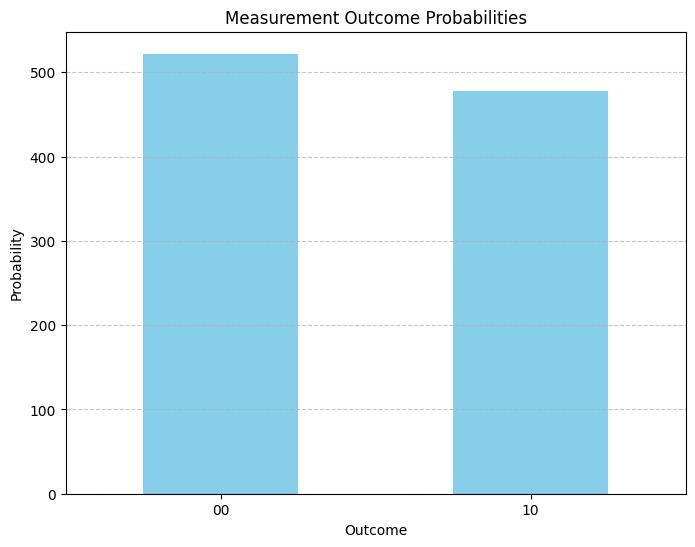

In [56]:
outcomeCounts.plot(kind="bar", color="skyblue", figsize=(8, 6))
plt.title("Measurement Outcome Probabilities")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()